# Comparison of Classification Models

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

### 1. Data Loading and Preparation

In [2]:
# Load dataset
df_music = pd.read_csv("data/music_clean.csv")
df_music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1000 non-null   int64  
 1   popularity        1000 non-null   float64
 2   acousticness      1000 non-null   float64
 3   danceability      1000 non-null   float64
 4   duration_ms       1000 non-null   float64
 5   energy            1000 non-null   float64
 6   instrumentalness  1000 non-null   float64
 7   liveness          1000 non-null   float64
 8   loudness          1000 non-null   float64
 9   speechiness       1000 non-null   float64
 10  tempo             1000 non-null   float64
 11  valence           1000 non-null   float64
 12  genre             1000 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 101.7 KB


In [3]:
# Create feature and target arrays
X = df_music.drop('genre', axis=1).values
y = df_music['genre'].values

### 2. Data Preprocessing

In [4]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 3. Model Definitions

In [6]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

### 4. Cross-Validation Evaluation

In [7]:
# Cross-validation setup
results = []
for name, model in models.items():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_scores)
    print(f"{name} Cross-Validation Mean Accuracy: {cv_scores.mean():.2f}")

Logistic Regression Cross-Validation Mean Accuracy: 0.93
KNN Cross-Validation Mean Accuracy: 0.92
Decision Tree Cross-Validation Mean Accuracy: 1.00


### 5. Cross-Validation Visualization

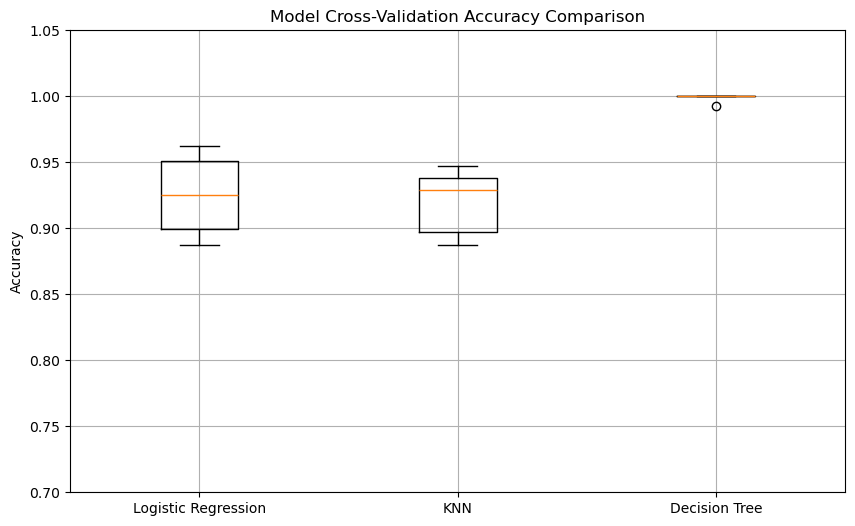

<Figure size 640x480 with 0 Axes>

In [8]:
# Boxplot for cross-validation results
plt.figure(figsize=(10, 6))
plt.boxplot(results, tick_labels=models.keys())
plt.title('Model Cross-Validation Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.05)
plt.grid(True)
plt.show()


### 6. Test Set Evaluation

In [9]:
test_scores = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    test_scores.append(test_score)
    print(f"{name} Test Set Accuracy: {test_score:.2f}")

Logistic Regression Test Set Accuracy: 0.86
KNN Test Set Accuracy: 0.88
Decision Tree Test Set Accuracy: 1.00


### 7. Test Results Visualization

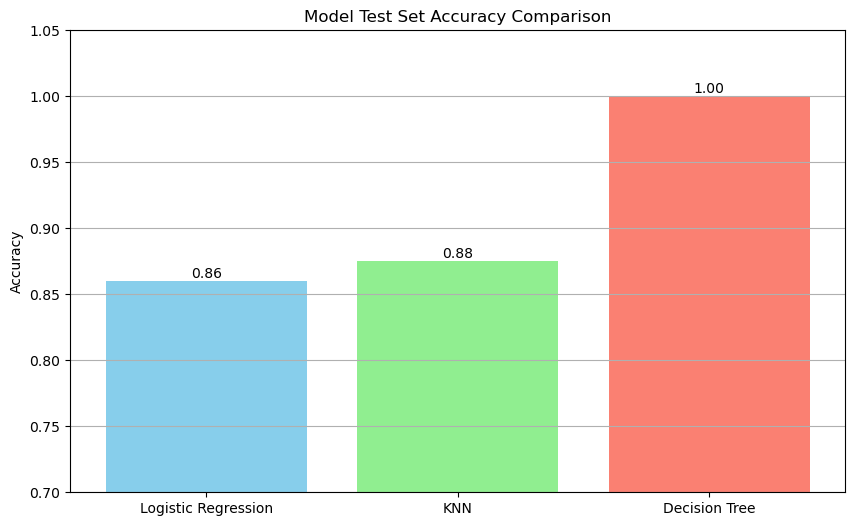

<Figure size 640x480 with 0 Axes>

In [10]:
# Bar plot for test results
plt.figure(figsize=(10, 6))
bars = plt.bar(models.keys(), test_scores, color=['skyblue', 'lightgreen', 'salmon'])

plt.title('Model Test Set Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.05)
plt.grid(axis='y')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

plt.show()
